In [82]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 
import seaborn as sns
from PIL import Image
import os
import glob
import cv2
Image.MAX_IMAGE_PIXELS = 933120000


In [9]:
# os.chdir("sample_breast_cancer")

# load in sample data 

In [110]:
def convert(input_name):

    img = np.asarray(Image.open(input_name).convert("RGB"))  # open image
    img = cv2.resize(img, (100, 100))  # resize to 100 pixels by 100 pixels
    
    return img 

In [111]:
def get_data_labels(directory):
    labels = []
    data = []
    filenames = []
    
    for input_dir in input_directories:
        for i, filename in enumerate(os.listdir(input_dir)):

            input_name = f"{input_dir}/{filename}"
            input_type = input_dir.split("/")[0]

            if "benign" in input_dir: 
                labels.append(0)
            else: 
                labels.append(1)

            img = convert(input_name)
            data.append(np.array(img))

    labels = np.array(labels)
    data = np.array(data)

    return labels, data 

In [117]:
test_labels, test_data = get_data_labels(["test/benign", "test/malignant"])
training_labels, training_data = get_data_labels(["training/benign", "training/malignant"])

In [118]:
training_data.shape, training_labels.shape

((40, 100, 100, 3), (40,))

# process data

In [123]:
x_train = training_data.astype("float32") / 255
x_test = test_data.astype("float32") / 255

In [124]:
x_train.shape, x_test.shape

((40, 100, 100, 3), (40, 100, 100, 3))

In [129]:
y_train = keras.utils.to_categorical(training_labels, num_classes= 2)
y_test = keras.utils.to_categorical(test_labels, num_classes= 2)

In [130]:
y_train.shape, y_test.shape

((40, 2), (40, 2))

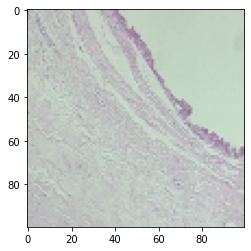

In [127]:
plt.imshow(x_train[0])
plt.show()

# model 

In [131]:
input_shape = x_train.shape[1:]
num_classes = y_train.shape[1]

In [132]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dropout (Dropout)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 6

2021-11-02 13:35:37.240058: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [134]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [136]:
history = model.fit(x_train, y_train, batch_size=5, epochs=5, validation_split=0.1)

Epoch 1/5
8/8 [==============================] - 0s 41ms/step - loss: 0.6330 - accuracy: 0.5833 - val_loss: 0.5178 - val_accuracy: 1.0000
Epoch 2/5
8/8 [==============================] - 0s 37ms/step - loss: 0.6283 - accuracy: 0.6944 - val_loss: 0.6327 - val_accuracy: 1.0000
Epoch 3/5
8/8 [==============================] - 0s 36ms/step - loss: 0.6851 - accuracy: 0.6389 - val_loss: 0.4421 - val_accuracy: 1.0000
Epoch 4/5
8/8 [==============================] - 0s 41ms/step - loss: 0.5486 - accuracy: 0.6389 - val_loss: 1.1770 - val_accuracy: 0.0000e+00
Epoch 5/5
8/8 [==============================] - 0s 37ms/step - loss: 0.5927 - accuracy: 0.6667 - val_loss: 0.5917 - val_accuracy: 1.0000


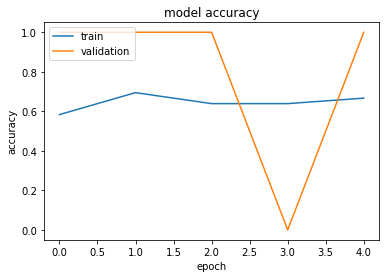

In [137]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

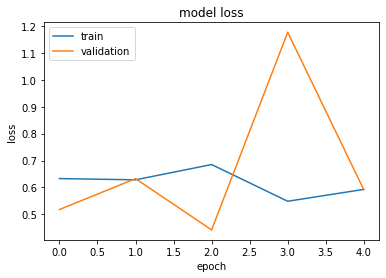

In [138]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

# evaluate

In [139]:
model.evaluate(x_test, y_test, verbose=0)

[0.5452009439468384, 0.8999999761581421]